# Task 1: Newton’s Forward Interpolation Formula.

f(2.5) using Newton's Forward Interpolation: 7.9102


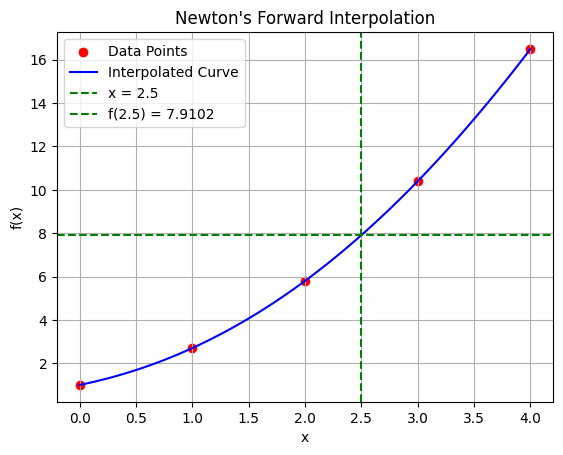

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math 

# Given data
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 2.7, 5.8, 10.4, 16.5])

# Function to calculate forward differences
def forward_difference(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]
    return diff_table

# Newton's Forward Interpolation Formula
def newton_forward(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[0]) / h
    diff_table = forward_difference(y_data)
    result = diff_table[0][0]
    for i in range(1, n):
        term = diff_table[0][i]
        for j in range(i):
            term *= (u - j)
        term /= math.factorial(i)  # Используем math.factorial вместо np.math.factorial
        result += term
    return result

# Estimate f(2.5)
x_val = 2.5
f_2_5 = newton_forward(x, y, x_val)
print(f"f(2.5) using Newton's Forward Interpolation: {f_2_5:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [newton_forward(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_2_5, color='green', linestyle='--', label=f'f({x_val}) = {f_2_5:.4f}')
plt.legend()
plt.title("Newton's Forward Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# Task 2: Newton’s Backward Interpolation Formula.


f(5.5) using Newton's Backward Interpolation: 6.1219


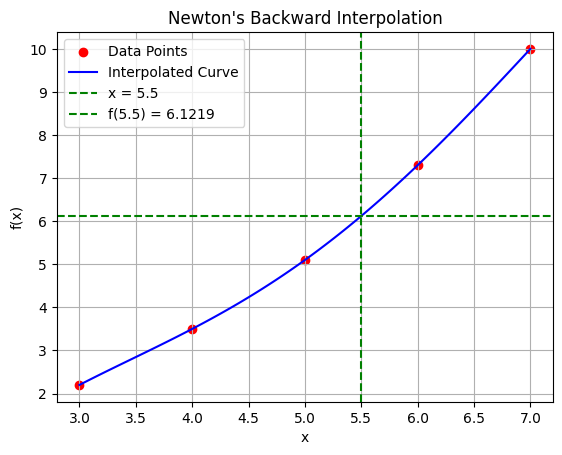

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Добавляем импорт модуля math

# Given data
x = np.array([3, 4, 5, 6, 7])
y = np.array([2.2, 3.5, 5.1, 7.3, 10.0])

# Function to calculate backward differences
def backward_difference(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i][j] = diff_table[i][j - 1] - diff_table[i - 1][j - 1]
    return diff_table

# Newton's Backward Interpolation Formula
def newton_backward(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[-1]) / h
    diff_table = backward_difference(y_data)
    result = diff_table[-1][0]
    for i in range(1, n):
        term = diff_table[-1][i]
        for j in range(i):
            term *= (u + j)
        term /= math.factorial(i)  # Используем math.factorial вместо np.math.factorial
        result += term
    return result

# Estimate f(5.5)
x_val = 5.5
f_5_5 = newton_backward(x, y, x_val)
print(f"f(5.5) using Newton's Backward Interpolation: {f_5_5:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [newton_backward(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_5_5, color='green', linestyle='--', label=f'f({x_val}) = {f_5_5:.4f}')
plt.legend()
plt.title("Newton's Backward Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# Task 3: Central Difference Interpolation Formula.

f(13) using Central Difference Interpolation: 169.0000


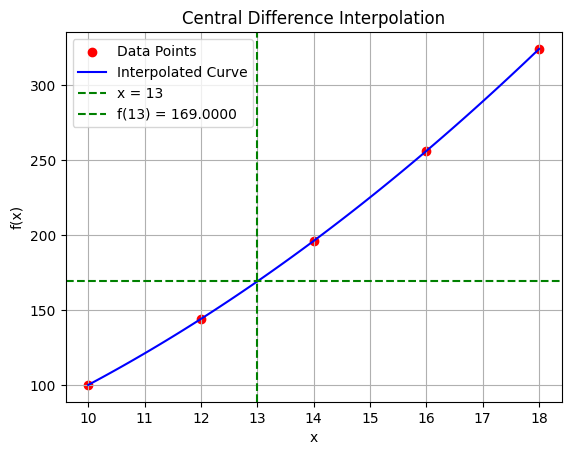

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Добавляем импорт модуля math

# Given data
x = np.array([10, 12, 14, 16, 18])
y = np.array([100, 144, 196, 256, 324])

# Function to calculate forward differences (used for central difference)
def forward_difference(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]
    return diff_table

# Central Difference Interpolation Formula
def central_difference_interpolation(x_data, y_data, x_val):
    n = len(x_data)
    h = x_data[1] - x_data[0]
    u = (x_val - x_data[n // 2]) / h
    diff_table = forward_difference(y_data)
    result = diff_table[n // 2][0]
    for i in range(1, n):
        term = diff_table[n // 2 - i // 2][i]
        for j in range(i):
            term *= (u - j)
        term /= math.factorial(i)  # Используем math.factorial
        result += term
    return result

# Estimate f(13)
x_val = 13
f_13 = central_difference_interpolation(x, y, x_val)
print(f"f(13) using Central Difference Interpolation: {f_13:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [central_difference_interpolation(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_13, color='green', linestyle='--', label=f'f({x_val}) = {f_13:.4f}')
plt.legend()
plt.title("Central Difference Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# Task 4: Lagrange’s Interpolation Formula.

f(6) using Lagrange's Interpolation: 2.7867


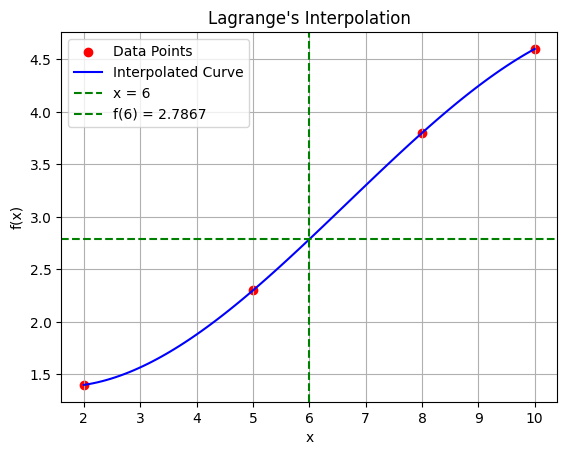

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([2, 5, 8, 10])
y = np.array([1.4, 2.3, 3.8, 4.6])

# Lagrange Interpolation Formula
def lagrange_interpolation(x_data, y_data, x_val):
    n = len(x_data)
    result = 0
    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if i != j:
                term *= (x_val - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result

# Estimate f(6)
x_val = 6
f_6 = lagrange_interpolation(x, y, x_val)
print(f"f(6) using Lagrange's Interpolation: {f_6:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [lagrange_interpolation(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_6, color='green', linestyle='--', label=f'f({x_val}) = {f_6:.4f}')
plt.legend()
plt.title("Lagrange's Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# Task 5: Newton’s Divided Difference Formula.

f(3) using Newton's Divided Difference: 9.7917


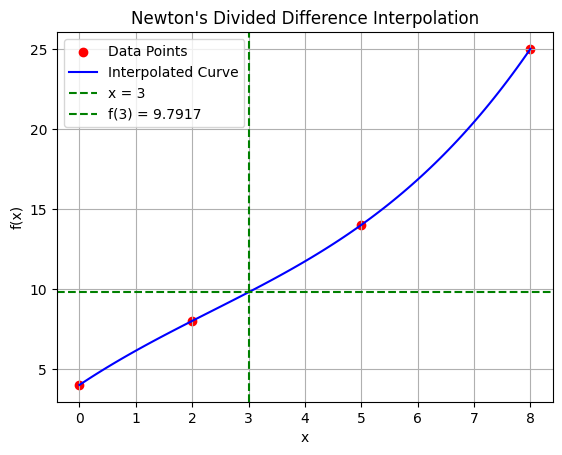

f(3) using Newton's Divided Difference: 9.7917


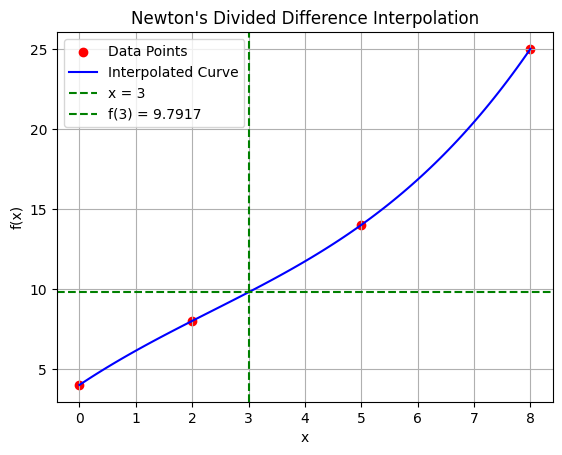

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Добавляем импорт модуля math

# Given data
x = np.array([0, 2, 5, 8])
y = np.array([4, 8, 14, 25])

# Function to calculate divided differences
def divided_differences(x_data, y_data):
    n = len(x_data)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_data
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i + 1][j - 1] - diff_table[i][j - 1]) / (x_data[i + j] - x_data[i])
    return diff_table

# Newton's Divided Difference Interpolation Formula
def newton_divided_difference(x_data, y_data, x_val):
    n = len(x_data)
    diff_table = divided_differences(x_data, y_data)
    result = diff_table[0][0]
    product_term = 1
    for i in range(1, n):
        product_term *= (x_val - x_data[i - 1])
        result += diff_table[0][i] * product_term
    return result

# Estimate f(3)
x_val = 3
f_3 = newton_divided_difference(x, y, x_val)
print(f"f(3) using Newton's Divided Difference: {f_3:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [newton_divided_difference(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_3, color='green', linestyle='--', label=f'f({x_val}) = {f_3:.4f}')
plt.legend()
plt.title("Newton's Divided Difference Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()# Given data
x = np.array([0, 2, 5, 8])
y = np.array([4, 8, 14, 25])

# Function to calculate divided differences
def divided_differences(x_data, y_data):
    n = len(x_data)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y_data
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i + 1][j - 1] - diff_table[i][j - 1]) / (x_data[i + j] - x_data[i])
    return diff_table

# Newton's Divided Difference Interpolation Formula
def newton_divided_difference(x_data, y_data, x_val):
    n = len(x_data)
    diff_table = divided_differences(x_data, y_data)
    result = diff_table[0][0]
    product_term = 1
    for i in range(1, n):
        product_term *= (x_val - x_data[i - 1])
        result += diff_table[0][i] * product_term
    return result

# Estimate f(3)
x_val = 3
f_3 = newton_divided_difference(x, y, x_val)
print(f"f(3) using Newton's Divided Difference: {f_3:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [newton_divided_difference(x, y, xi) for xi in x_plot]
plt.plot(x_plot, y_plot, label='Interpolated Curve', color='blue')
plt.axvline(x=x_val, color='green', linestyle='--', label=f'x = {x_val}')
plt.axhline(y=f_3, color='green', linestyle='--', label=f'f({x_val}) = {f_3:.4f}')
plt.legend()
plt.title("Newton's Divided Difference Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

# Task 6: Cubic Spline Interpolation.

f(2.5) using Cubic Spline Interpolation: 3.9719
f(4.3) using Cubic Spline Interpolation: 6.9550


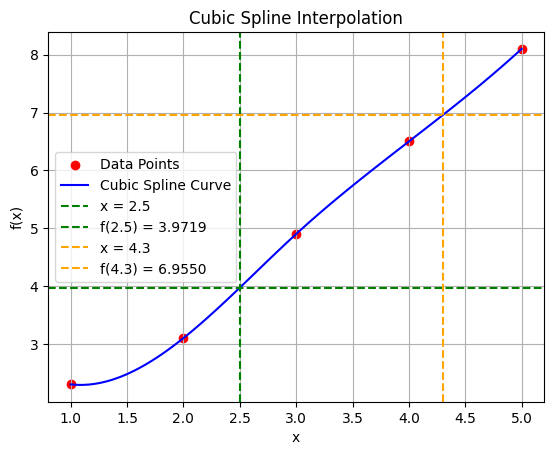

In [17]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.3, 3.1, 4.9, 6.5, 8.1])

# Cubic Spline Interpolation
cs = CubicSpline(x, y)

# Estimate f(2.5) and f(4.3)
x_val_1 = 2.5
x_val_2 = 4.3
f_2_5 = cs(x_val_1)
f_4_3 = cs(x_val_2)
print(f"f(2.5) using Cubic Spline Interpolation: {f_2_5:.4f}")
print(f"f(4.3) using Cubic Spline Interpolation: {f_4_3:.4f}")

# Plotting the results
plt.scatter(x, y, color='red', label='Data Points')
x_plot = np.linspace(min(x), max(x), 100)
y_plot = cs(x_plot)
plt.plot(x_plot, y_plot, label='Cubic Spline Curve', color='blue')
plt.axvline(x=x_val_1, color='green', linestyle='--', label=f'x = {x_val_1}')
plt.axhline(y=f_2_5, color='green', linestyle='--', label=f'f({x_val_1}) = {f_2_5:.4f}')
plt.axvline(x=x_val_2, color='orange', linestyle='--', label=f'x = {x_val_2}')
plt.axhline(y=f_4_3, color='orange', linestyle='--', label=f'f({x_val_2}) = {f_4_3:.4f}')
plt.legend()
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()